<a href="https://colab.research.google.com/github/pavankumarallu/Search-Engine-Models/blob/main/Resnet_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from numpy.linalg import norm
import pickle
from tqdm import tqdm, tqdm_notebook
import os
import time
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.applications.inception_v3 import InceptionV3


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
model = ResNet50(weights='imagenet', include_top=False,
                 input_shape=(224, 224, 3))
model_incept = InceptionV3(weights='imagenet', include_top=False,input_shape = (224,224,3), pooling='max')
def extract_features(img_path, model):
    input_shape = (224, 224, 3)
    img = image.load_img(img_path, target_size=(
        input_shape[0], input_shape[1]))
    img_array = image.img_to_array(img)
    expanded_img_array = np.expand_dims(img_array, axis=0)
    preprocessed_img = preprocess_input(expanded_img_array)
    features = model.predict(preprocessed_img)
    flattened_features = features.flatten()
    normalized_features = flattened_features / norm(flattened_features)
    return normalized_features

87924736/87910968 [==============================] - 1s 0us/step


In [ ]:
extensions = ['.jpg', '.JPG', '.jpeg', '.JPEG', '.png', '.PNG']
def get_file_list(root_dir):
    file_list = []
    counter = 1
    for root, directories, filenames in os.walk(root_dir):
        for filename in filenames:
            if any(ext in filename for ext in extensions):
                file_list.append(os.path.join(root, filename))
                counter += 1
    return file_list

In [ ]:
root_dir = "/content/drive/MyDrive/img"

In [ ]:
filenames = sorted(get_file_list(root_dir))

In [ ]:
new_file = []
for i in filenames:
    new_file.append(i.replace("/content/drive/MyDrive","./static"))

In [ ]:
new_file

In [ ]:
feature_list = []
for i in tqdm_notebook(range(len(filenames))):
    feature_list.append(extract_features(filenames[i], model))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/1227 [00:00<?, ?it/s]

In [ ]:
feature_list_incept = []
for i in tqdm_notebook(range(len(filenames))):
    feature_list_incept.append(extract_features(filenames[i], model_incept))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/1227 [00:00<?, ?it/s]

In [ ]:
pickle.dump(feature_list_incept, open('/content/drive/MyDrive/features-Material-incept.pkl', 'wb'))

In [ ]:
pickle.dump(feature_list, open('/content/drive/MyDrive/features-Material-resnet.pkl', 'wb'))
pickle.dump(new_file, open('/content/drive/MyDrive/filenames-Material1.pkl','wb'))

In [ ]:
filenames = pickle.load(open('/content/drive/MyDrive/filenames-Material.pkl', 'rb'))
feature_list = pickle.load(open('/content/drive/MyDrive/features-Material-resnet.pkl', 'rb'))

In [ ]:
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=15, algorithm='brute',metric='euclidean').fit(feature_list_incept)
neighbors1 = NearestNeighbors(n_neighbors=15, algorithm='brute',metric='euclidean').fit(feature_list)
distances, indices = neighbors.kneighbors([feature_list_incept[0]])

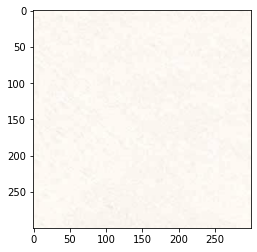

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
plt.imshow(mpimg.imread(filenames[0]))


In [ ]:
indices

array([[   0,  840, 1116,  413,    1, 1005,  792,  211,  310,  330,  240,
          84,  717,  486,  312]])

In [ ]:
features1 = extract_features("/content/7.jpg",model)
features2 = extract_features("/content/7.jpg",model_incept)

In [ ]:
distances1, indices1 = neighbors1.kneighbors([features1])
distances2, indices2 = neighbors.kneighbors([features2])

In [ ]:
distances1,distances2

(array([[0.82886916, 0.8314983 , 0.8706408 , 0.8712745 , 0.88359475,
         0.884101  , 0.8868386 , 0.8885386 , 0.89589465, 0.90091413,
         0.90405947, 0.9042946 , 0.90489274, 0.90801656, 0.90918887]],
       dtype=float32),
 array([[0.35226056, 0.36486998, 0.36875144, 0.3722086 , 0.3737018 ,
         0.37409362, 0.37409362, 0.37604305, 0.3781216 , 0.38040707,
         0.38093957, 0.38711485, 0.39033332, 0.39152446, 0.3922783 ]],
       dtype=float32))

In [ ]:
indices1,indices2

(array([[146, 497,  64, 533, 135, 725, 498, 229, 180, 268, 418,  66, 423,
         581, 641]]),
 array([[ 405, 1162,  462,  465,  810,  913,  914,   81,  641,  146,  657,
          694,  724,  945,  379]]))

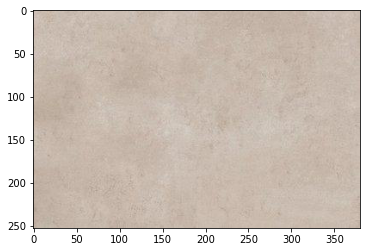

In [ ]:
plt.imshow(mpimg.imread(filenames[64]))

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
# Perform PCA over the features
num_feature_dimensions=100      # Set the number of features
pca = PCA(n_components = num_feature_dimensions)
pca.fit(feature_list)
feature_list_compressed = pca.transform(feature_list)



[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1200 samples in 0.014s...
[t-SNE] Computed neighbors for 1200 samples in 0.315s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1200
[t-SNE] Computed conditional probabilities for sample 1200 / 1200
[t-SNE] Mean sigma: 0.298408
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.243301
[t-SNE] KL divergence after 1000 iterations: 0.818314


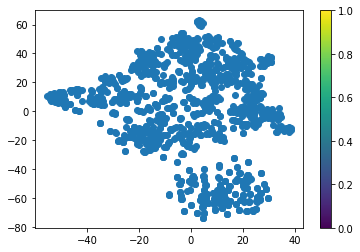

In [ ]:
# For speed and clarity, we'll analyze about first half of the dataset.
selected_features = feature_list_compressed[:1200]
# selected_class_ids = class_ids[:4000]
selected_filenames = filenames[:1200]

tsne_results = TSNE(n_components=2,verbose=1,metric='euclidean').fit_transform(selected_features)

# Plot a scatter plot from the generated t-SNE results
colormap = plt.cm.get_cmap('coolwarm')
scatter_plot = plt.scatter(tsne_results[:,0],tsne_results[:,1],cmap=colormap)
plt.colorbar(scatter_plot)
plt.show()